In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_FOLDER = 'data/'

train = pd.read_csv(DATA_FOLDER+'soybean-large.csv')
test = pd.read_csv(DATA_FOLDER+'soybean-large-test.csv')

print(f"Shape of train: {train.shape}")
print(f"Shape of test: {test.shape}")

Shape of train: (307, 36)
Shape of test: (376, 36)


In [3]:
train.sample(10)

,target,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
23,rhizoctonia-root-rot,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
186,anthracnose,6.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0
49,phytophthora-rot,0.0,1.0,2.0,1.0,0.0,3.0,1.0,1.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
263,frog-eye-leaf-spot,4.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
77,brown-stem-rot,6.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,...,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
218,alternarialeaf-spot,6.0,0.0,2.0,2.0,0.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,bacterial-pustule,3.0,0.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
222,alternarialeaf-spot,6.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,frog-eye-leaf-spot,6.0,0.0,1.0,2.0,0.0,3.0,3.0,0.0,1.0,...,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0
65,phytophthora-rot,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Find out the null values
print(f"Null values in train: {train.isnull().sum()}")

Null values in train: target              0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspots-size     25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external-decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit-spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64


In [5]:
# # Using most frequent strategy to impute missing values in pandas dataset

# train = train.fillna(train.mode().iloc[0])
# test = test.fillna(test.mode().iloc[0])

# train.sample(10)

# Dropping na

train = train.dropna()
test= test.dropna()

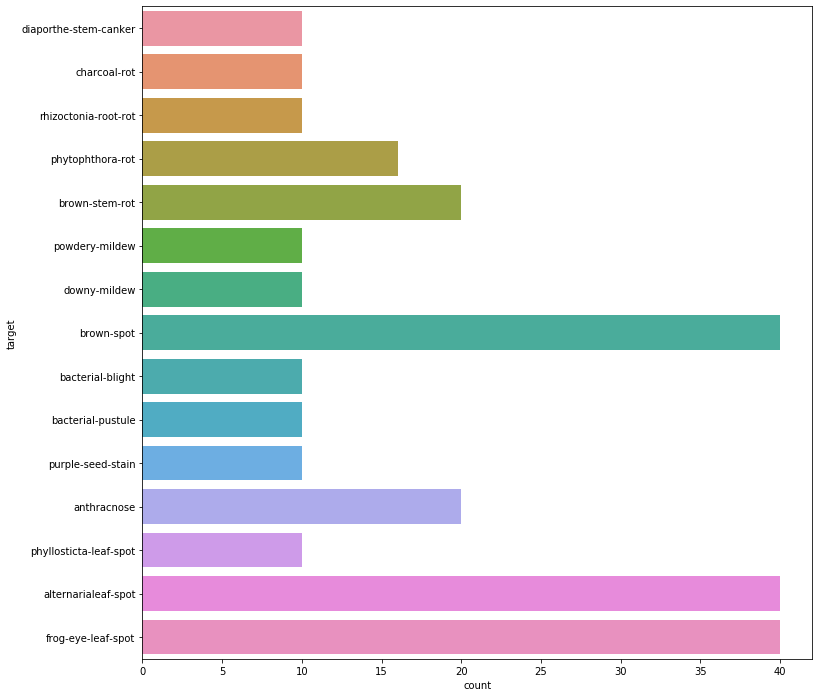

In [6]:
# EDA 1 : Count of target variables per target class

fig = plt.figure(figsize=(12, 12))

p1 = sns.countplot(y='target', data=train)

plt.savefig('output/Target_count_per_variable.jpg')

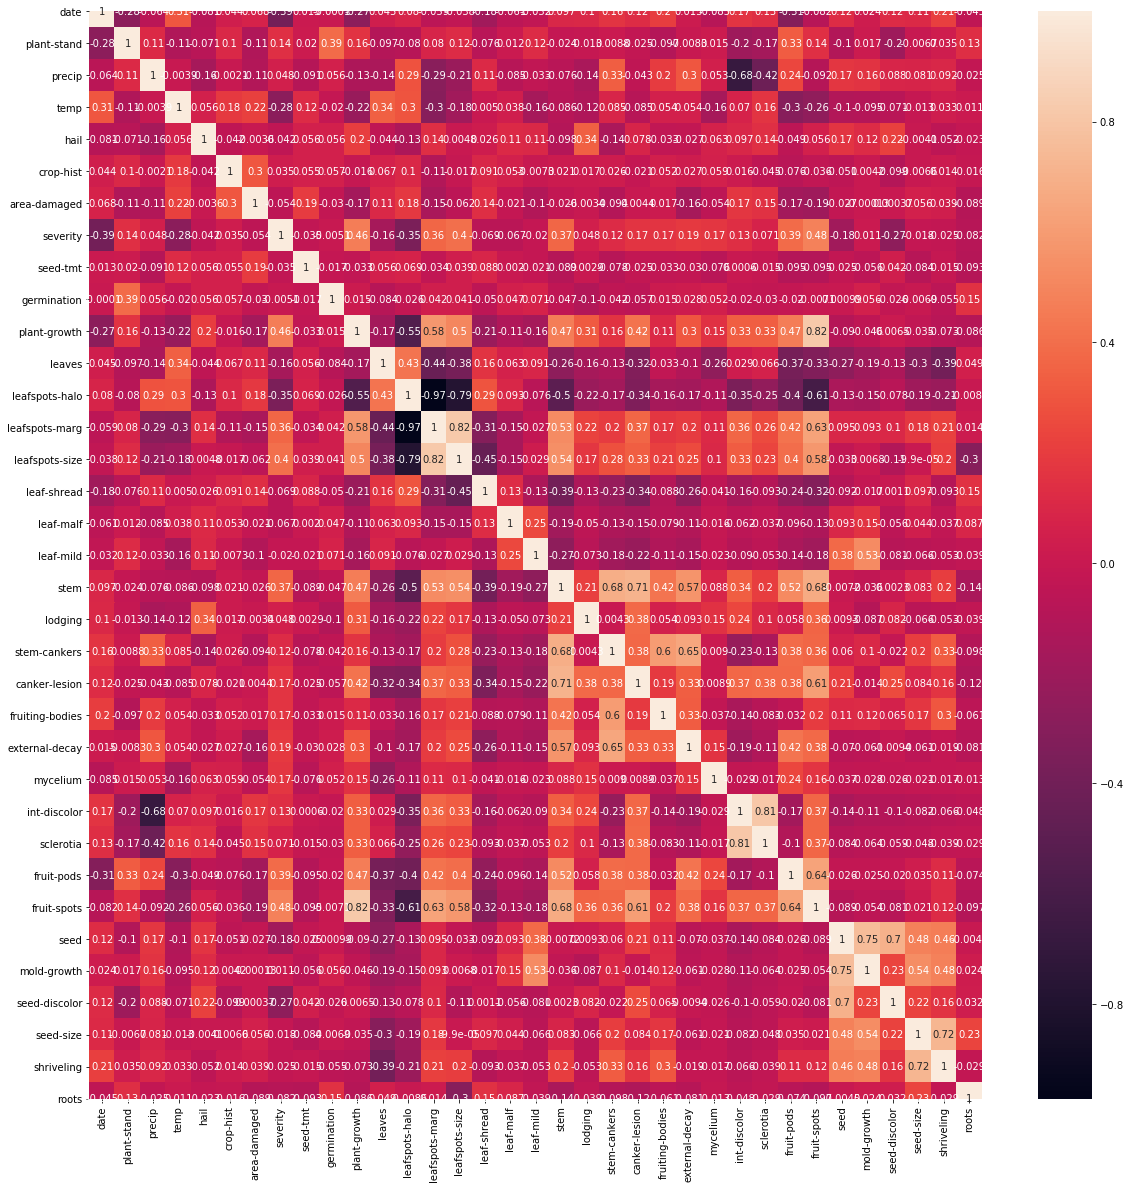

In [7]:
# EDA 2 : Correlation map of each independent attribute
fig = plt.figure(figsize=(20, 20))

p2 = sns.heatmap(train.drop('target', axis=1).corr(), annot=True)

plt.plot()

plt.savefig('output/correlation_analysis.jpg')

In [8]:
# Drop highly correlated |corr| > 0.75

high_corr_columns = ['leafspots-halo', 'leafspots-size']

train = train.drop(high_corr_columns, axis=1)
test = test.drop(high_corr_columns, axis=1)

In [9]:
# Convert target variables to ordinal variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(test['target'])

train['target'] = le.transform(train['target'])
test['target'] = le.transform(test['target'])

Accuracy using Adaboost: 0.2962962962962963


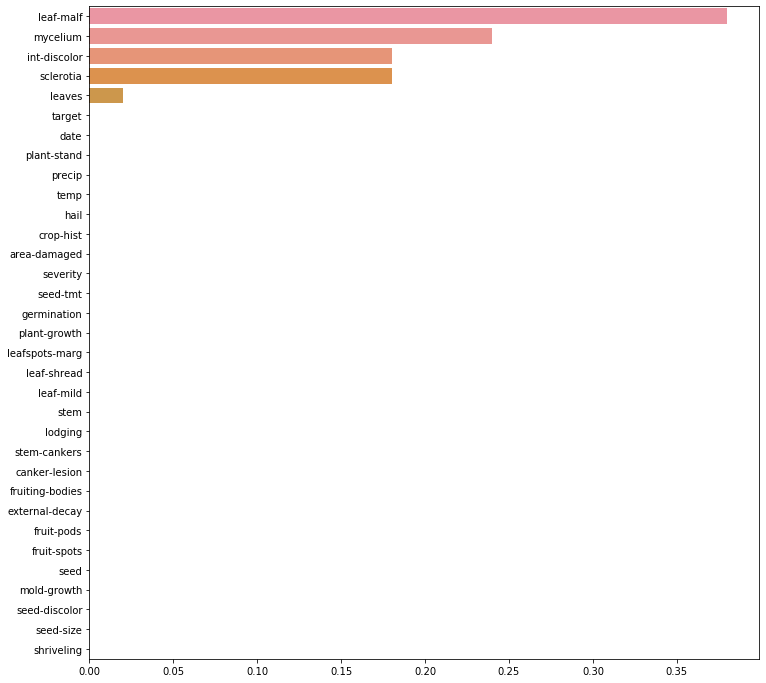

In [10]:
# Feature Selection using Feature Importances using Ensemble techniques

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('target', axis=1), train['target'], test_size=0.2)

abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_test)

print(f"Accuracy using Adaboost: {accuracy_score(y_pred, Y_test)}")

column_fi = list(zip(train.columns, abc.feature_importances_))
column_fi = sorted(column_fi, key=lambda x: x[1], reverse=True)

fi = []
cols = []
for obj in column_fi:
    cols.append(obj[0])
    fi.append(obj[1])

fig = plt.figure(figsize=(12, 12))

p3 = sns.barplot(y=cols, x=fi)

plt.savefig('output/featrue_selection_adaboost.jpg')

In [11]:
# Select the most important columns and target variable

imp_columns = ['leaf-malf', 'mycelium', 'int-discolor', 'sclerotia', 'leaves']
target = ['target']

In [12]:
# Train the SVC model without feature selection

from sklearn.metrics import f1_score

svc = SVC(C=0.1, kernel='poly', degree=5, verbose=True)
svc.fit(train.drop('target', axis=1), train['target'])
predictions = svc.predict(test.drop('target', axis=1))

print(f"Accuracy : {accuracy_score(predictions, test['target'])}")

[LibSVM]Accuracy : 0.7128378378378378


In [13]:
# classification Report

report = classification_report(test['target'], predictions)

print(report)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        51
           1       1.00      0.83      0.91        24
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.39      0.98      0.56        52
           5       0.94      0.71      0.81        24
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      0.40      0.57        10
           9       0.95      0.73      0.82        51
          10       0.00      0.00      0.00        10
          11       1.00      1.00      1.00         4
          12       0.00      0.00      0.00        10
          13       1.00      0.70      0.82        10
          14       1.00      1.00      1.00        10

    accuracy                           0.71       296
   macro avg       0.68      0.61      0.62       296
weighted avg       0.73   

In [14]:
# Training SVC model with feature selection

train = train[imp_columns+target]
test = test[imp_columns+target]

svc.fit(train.drop('target', axis=1), train['target'])
predictions = svc.predict(test.drop('target', axis=1))

print(f"Accuracy : {accuracy_score(predictions, test['target'])}")

[LibSVM]Accuracy : 0.3344594594594595


In [15]:
report = classification_report(test['target'], predictions)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.43      0.62      0.51        24
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        52
           5       1.00      0.71      0.83        24
           6       1.00      1.00      1.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.23      1.00      0.37        51
          10       0.50      0.60      0.55        10
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10

    accuracy                           0.33       296
   macro avg       0.21      0.26      0.22       296
weighted avg       0.21   